# Assignment 3 – Anomaly Detection

###  Dataset - "Credit Card Fraud Detection" 

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Load the Credit Card Fraud Detection" dataset from the kaggle database
df = pd.read_csv("creditcard.csv")

# Display the first few rows of the dataset
print("The first few rows of the dataset:-\n",df.head())

# Display the number of rows and columns in the dataset
print("The number of rows and columns in the dataset is",df.shape)

# Display summary statistics of the numerical columns
print("\nThe summary statistics of the numerical columns:-\n",df.describe())

# Check the data types of each column
print("\nThe data types of each column:-\n",df.dtypes)



The first few rows of the dataset:-
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010

## Visulzation:- 

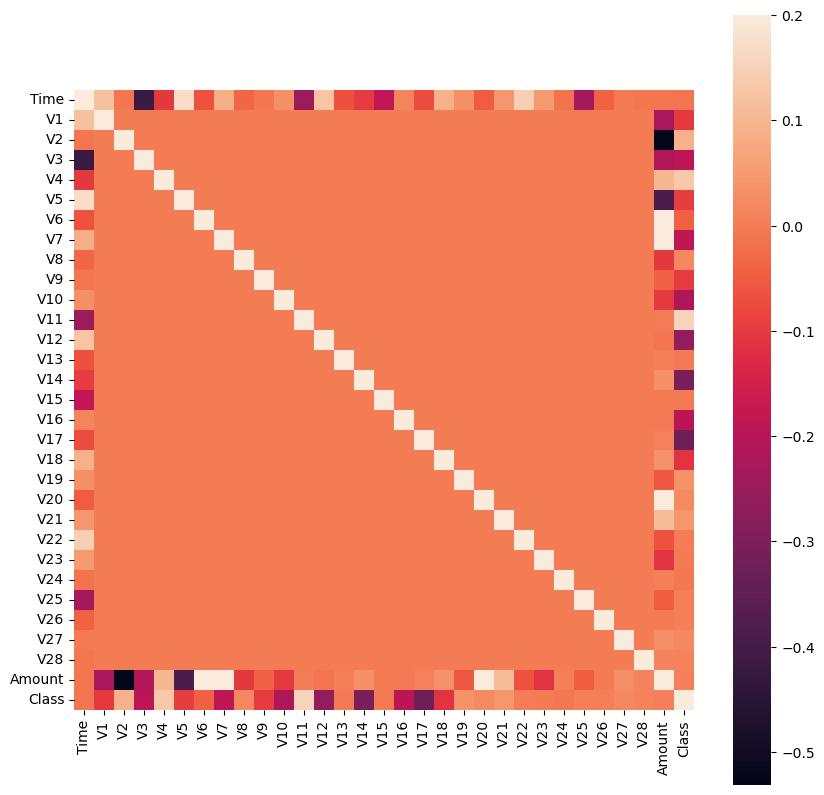

In [2]:

# Plot correlation matrix heatmap
corr_matrix = df.corr()
fig         = plt.figure(figsize = (10,10))
sb.heatmap(corr_matrix, vmax = 0.2, square = True)
plt.show()


### Check for any Missing values

Check if there are any missing values in the dataset and decide on an appropriate strategy to handle them. In the "Credit Card Fraud Detection" dataset, it is important to ensure that there are no missing values as anomaly detection algorithms may not handle them well. If there are missing values, you can either impute them with mean, median, or a custom value, or remove the rows containing missing values depending on the extent and nature of missingness.

In [3]:
# Check for any missing values
print("\nChecking if any missing values:-\n",df.isnull().sum())


Checking if any missing values:-
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### Data Normalization:

Since the "Amount" and "Time" features have different scales compared to the PCA-transformed features (V1 to V28), we can normalize them to have a consistent scale. This step is not always necessary, depending on the anomaly detection algorithm used, but it's good practice to ensure features are on similar scales:

In [3]:

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler       = StandardScaler()

# Normalize the "Amount" and "Time" columns
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time']   = scaler.fit_transform(df[['Time']])

### Feature Selection:

Since the PCA-transformed features (V1 to V28) are already the principal components of the original data, they represent the most relevant information. However, in some cases, feature selection methods like SelectKBest or feature importance analysis can be applied to choose the most informative features:

In [4]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Apply feature selection if needed
# For example, using SelectKBest to select the top 10 most important features
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)


When applying anomaly detection algorithms to this dataset, the goal is to use the features (**Time, V1 to V28, and Amount**) to predict the target variable (**Class**), i.e., identifying whether a given transaction is fraudulent or not based on the provided attributes.

#### Features (Independent Variables):

The features in the dataset include the following:-

Time: Represents the number of seconds elapsed between a specific transaction and the first transaction in the dataset.

V1 to V28: Anonymized features resulting from a PCA transformation of the original transaction data. These features capture the principal components of the data, maintaining the most relevant information while preserving anonymity.

Amount: Represents the monetary value of the transaction.

#### Target Variable (Dependent Variable):

The target variable in the dataset is **Class**.


Keep in mind that feature selection might not be necessary for anomaly detection since PCA transformation already captures the most relevant information.

After completing these preprocessing steps, the dataset is ready for applying anomaly detection algorithms. Remember that selecting an appropriate algorithm and considering the class imbalance (fraudulent vs. non-fraudulent transactions) is essential for effective detection of credit card fraud. Popular anomaly detection algorithms include Isolation Forest, Local Outlier Factor (LOF), and One-Class SVM.

# Exploring the dataset to understand the distribution of normal and fraudulent transactions.


The class distribution, that is, 1 is fraudulent and 0 is non-fraudulent transactions:-
Fraud Cases: 492
Valid Transactions: 284315

The amount of fraud transaction:-
 count    492.000000
mean       0.135382
std        1.026242
min       -0.353229
25%       -0.349231
50%       -0.316247
75%        0.070128
max        8.146182
Name: Amount, dtype: float64

The amount of valid transaction:-
 count    284315.000000
mean         -0.000234
std           0.999942
min          -0.353229
25%          -0.330640
50%          -0.265271
75%          -0.045177
max         102.362243
Name: Amount, dtype: float64

Class Distribution:
Non-Fraudulent Transactions (Class 0): 284315
Fraudulent Transactions (Class 1): 492
Percentage of Fraudulent Transactions: 0.17%
Percentage of Non-Fraudulent Transactions: 99.83%


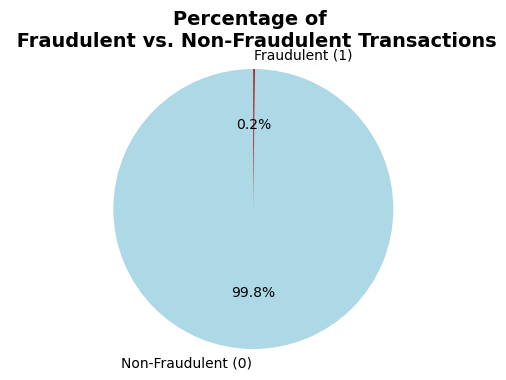

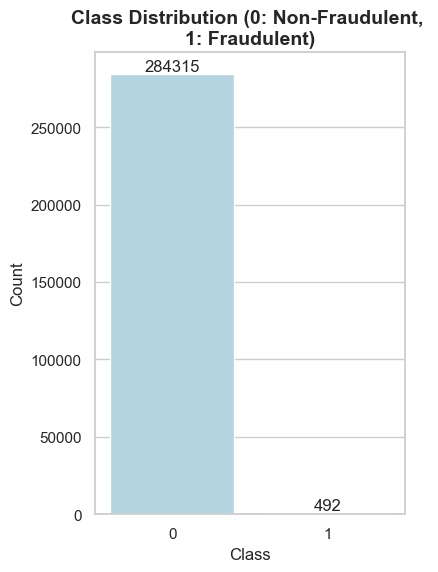

In [7]:
# Check the class distribution (fraudulent vs. non-fraudulent transactions)
print("\nThe class distribution, that is, 1 is fraudulent and 0 is non-fraudulent transactions:-")
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

# Checking the amount (fraudulent vs. non-fraudulent transactions)
fraud_transaction = df[df['Class'] == 1]
valid_transaction = df[df['Class'] == 0]
print("\nThe amount of fraud transaction:-\n",fraud_transaction.Amount.describe())
print("\nThe amount of valid transaction:-\n",valid_transaction.Amount.describe())

# Explore the class distribution
class_distribution   = df['Class'].value_counts()

# Calculate the percentage of fraudulent transactions
fraud_percentage     = (class_distribution[1] / (class_distribution[0] + class_distribution[1])) * 100
non_fraud_percentage = (class_distribution[0] / (class_distribution[0] + class_distribution[1])) * 100

print("\nClass Distribution:")
print("Non-Fraudulent Transactions (Class 0):", class_distribution[0])
print("Fraudulent Transactions (Class 1):", class_distribution[1])
print("Percentage of Fraudulent Transactions: {:.2f}%".format(fraud_percentage))
print("Percentage of Non-Fraudulent Transactions: {:.2f}%".format(non_fraud_percentage))

    
# Plot the percentage of each class
plt.figure(figsize = (6, 4))
plt.pie(class_distribution, labels = ['Non-Fraudulent (0)', 'Fraudulent (1)'], colors = ["lightblue", "darkred"], autopct = '%1.1f%%', startangle = 90)
plt.title('Percentage of \n Fraudulent vs. Non-Fraudulent Transactions', fontweight = 'bold', fontsize = 14)
plt.axis('equal')
plt.show()


sb.set(style="whitegrid")
# Plot the class distribution
plt.figure(figsize = (4, 6))
sb.countplot(x = 'Class', data = df, palette = ["lightblue", "darkred"])

# For the counts of class distribution, we will add text annotations 
for i, class_distribution in enumerate(class_distribution):
    plt.text(i, class_distribution, str(class_distribution), ha='center', va='bottom', fontsize=12)
    
plt.title('Class Distribution (0: Non-Fraudulent, \n1: Fraudulent)', fontweight = 'bold', fontsize = 14)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# Anomaly Detection Techniques 
Implement at least two different anomaly detection techniques. Some suggested techniques include:

a. Statistical-based approaches (e.g., Z-score, modified Z-score)

b. Density-based methods (e.g., Local Outlier Factor, DBSCAN)

c. Clustering-based techniques (e.g., k-means clustering, Gaussian Mixture Models)

d. Machine learning algorithms (e.g., Isolation Forest, One-Class SVM)

e. You can choose the techniques based on your interest and understanding.

## Local Outlier Factor (LOF) Anomaly Detection:

In [8]:

from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


# Extract the features and target variable
X = df.drop('Class', axis = 1)
y = df['Class']

# Initialize and fit the Local Outlier Factor (LOF) model
lof = LocalOutlierFactor(contamination=0.01)  # Contamination is the proportion of outliers in the dataset
y_pred_lof = lof.fit_predict(X)

# Convert LOF predictions to binary values (-1 for outliers, 1 for inliers)
y_pred_lof[y_pred_lof == 1] = 0
y_pred_lof[y_pred_lof == -1] = 1

# Number of anomalies detected using LOF
num_anomalies_lof = len(y_pred_lof[y_pred_lof == 1])
print("Number of anomalies detected using LOF:", num_anomalies_lof)

# Evaluate performance using metrics
precision_lof = precision_score(y, y_pred_lof)
recall_lof    = recall_score(y, y_pred_lof)
f1_score_lof  = f1_score(y, y_pred_lof)
roc_auc_lof   = roc_auc_score(y, y_pred_lof)

print("\nLocal Outlier Factor (LOF) Anomaly Detection Metrics:")
print("Precision:", precision_lof)
print("Recall:", recall_lof)
print("F1 Score:", f1_score_lof)
print("ROC AUC Score:", roc_auc_lof)

print("\nClassification Report (LOF):")
print(classification_report(y, y_pred_lof))

Number of anomalies detected using LOF: 2849

Local Outlier Factor (LOF) Anomaly Detection Metrics:
Precision: 0.005265005265005265
Recall: 0.03048780487804878
F1 Score: 0.008979347500748278
ROC AUC Score: 0.5102599937462013

Classification Report (LOF):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.01      0.03      0.01       492

    accuracy                           0.99    284807
   macro avg       0.50      0.51      0.50    284807
weighted avg       1.00      0.99      0.99    284807



## Z-score Anomaly Detection

In [7]:

from scipy.stats import zscore
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report


# Extract the features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Calculate the Z-scores for each feature
z_scores = np.abs(zscore(X))

# Define a threshold for anomaly detection (e.g., 3 standard deviations)
threshold = 3

# Identify anomalies based on Z-scores
anomalies_zscore = np.where(z_scores > threshold)

# Create a binary array to represent anomalies (1 for anomalies, 0 for normal instances)
y_pred_zscore = np.zeros(len(y))
y_pred_zscore[anomalies_zscore[0]] = 1

# Number of anomalies detected using zscore
num_anomalies_zscore = len(y_pred_zscore[y_pred_zscore == 1])
print("\nNumber of anomalies detected using Zscore:", num_anomalies_zscore)

# Evaluate performance using metrics
precision_zscore = precision_score(y, y_pred_zscore)
recall_zscore    = recall_score(y, y_pred_zscore)
f1_score_zscore  = f1_score(y, y_pred_zscore)
roc_auc_zscore   = roc_auc_score(y, y_pred_zscore)

print("\nZ-score Anomaly Detection Metrics:")
print("Precision:", precision_zscore)
print("Recall:", recall_zscore)
print("F1 Score:", f1_score_zscore)
print("ROC AUC Score:", roc_auc_zscore)

print("\nClassification Report of Z-score:")
print(classification_report(y, y_pred_zscore))


Number of anomalies detected using Zscore: 37816

Z-score Anomaly Detection Metrics:
Precision: 0.01174106198434525
Recall: 0.9024390243902439
F1 Score: 0.023180536702516446
ROC AUC Score: 0.8854966344011258

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    284315
           1       0.01      0.90      0.02       492

    accuracy                           0.87    284807
   macro avg       0.51      0.89      0.48    284807
weighted avg       1.00      0.87      0.93    284807

